# Capstone Project -Exploring the Restaurant Scenario in the  Neighbourhood of Tirupathi
### Applied Datascience capstone project for IBM/Coursera

## Content
* [Introduction:Business Problem](#Introduction)
    * [Target Audience](#TargetAudience)
* [Data](#Data)
    * [data cleaning](#datacleaning)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name='introduction'></a>


In this project we will put efforts in analysing the restaurant scenario based on the location and cuisines located in the temple city **Tirupathi**.**Tirupathi** is India’s top pilgrimage centre and has a floating population averaging from 55,000 to 1,00,000 everyday. There are various types of restaurants catering to the needs of the floating population. Most of the restaurants are clustered around the places where likelihood of foot fall is high (Temples, Pilgrim complexes, Travel complexes etc). Urban population has a very little choice for food options in the city, as most of the restaurants in the city are of Standard Indian Cuisine Keeping in the mind to cater to the needs of Pilgrims. In this project we will try to propose various categories of restaurants around a defined central location, based on the ratings, price range and distance from the central location of the City. We will fetch the data from Foursquare API and Zomato API's and analyse the data .We will also plot various  Interactive maps which will help understand the dynamics of a restaurants profile. 


### Target Audience <a name="TargetAudience"></a>


Entrepreneurs interested in investing in the business of Food & Beverages in Tirupati will benefit in understanding the different dimensions to be factored in while setting up business. We can recommend stakeholders by exploring the neighbourhoods based on the ratings, price range and proximity for each of the profiled categories. We can recommend which category of Restaurant will stand out uniquely in the city.

We will use the data science tools and techniques to understand or weigh in the pros and cons of a location. We provide an analysis for the stakeholders to take a data driven decision to choose the best category/location/price range in the city about most promising and viable option.


## Data <a name='Data'></a>


We have sourced data using APIs to fetch various venues scattered around the city of Tirupathi within radius of 20 kms. We have used Foursquare API to fetch various venues irrespective of category. Using Zomato API, we have fetched all the restaurants located around 3 km radius of each of the venues and collected the restaurant names, cuisines, locations, rating and average price of restaurants.

In [39]:
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim


#### Get Tirupathi location's latitude,longitude

In [40]:
address='Tirupati'
geolocator=Nominatim(user_agent='Tpty_explorer')


In [41]:
location=geolocator.geocode(address,timeout=None)
print(location)
latitude=location.latitude
longitude=location.longitude
print('{} is latitude. {} is longitude'.format(latitude,longitude))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  """Entry point for launching an IPython kernel.


Tirupati, Tirupati (Urban), Chittoor, Andhra Pradesh, 517500, India
13.6316368 is latitude. 79.4231711 is longitude


In [ ]:
CLIENT_ID = '<Access client ID>' 
CLIENT_SECRET = '<Access Client secret id>' 
VERSION = '20180604'
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [43]:
radius=20000
LIMIT=150


#### From Foursquare API (https://api.foursquare.com/v2/venues/) ,  retrieved the following for each venue:
* Name: The name of the venue.
* Category: The category type as defined by the API.
* Latitude: The latitude value of the venue.
* Longitude: The longitude value of the venue.


In [44]:
fsq_url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude, 
    radius, 
    LIMIT)

In [45]:
fsq_request=requests.get(fsq_url).json()


In [46]:
fsq_venues=json_normalize(fsq_request['response']['groups'][0]['items'])
fsq_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4f29cb74e4b0adf3a0a9d912-0,"[{'id': '4bf58dd8d48988d159941735', 'name': 'T...",4f29cb74e4b0adf3a0a9d912,Tirupati,IN,NaN,India,NaN,2563,"[Tirupati, Andhra Pradesh, India]","[{'label': 'display', 'lat': 13.64698944090000...",13.646989,79.405511,NaN,Andhra Pradesh,Alipiri,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5079323ee4b0dad8221076c2-1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",5079323ee4b0dad8221076c2,Near Railway Flyover,IN,Tirupati,India,Renigunta Road,792,"[Near Railway Flyover (Renigunta Road), Tirupa...","[{'label': 'display', 'lat': 13.62740700170034...",13.627407,79.429059,517501,Andhra Pradesh,Minerva Grand,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-55b3c037498e7fb45106cfbf-2,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",55b3c037498e7fb45106cfbf,Tirupati,IN,NaN,India,NaN,3134,"[Tirupati, India]","[{'label': 'display', 'lat': 13.65683140225769...",13.656831,79.436119,NaN,NaN,Marasa Sarovar Premiere,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4cce21f2063a721ec8ce989a-3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",4cce21f2063a721ec8ce989a,Near Railway Overbridge,IN,Tirupati,India,Renigunta Road,929,"[Near Railway Overbridge (Renigunta Road), Tir...","[{'label': 'display', 'lat': 13.62711972841358...",13.627120,79.430396,517501,Andhra Pradesh,Bhimas Residency Hotel,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4e34e42f8877beb5e9a68f04-4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",4e34e42f8877beb5e9a68f04,"NH 205,Near Ramanuja Circle",IN,Tirupati,India,Renigunta Road,1205,"[NH 205,Near Ramanuja Circle (Renigunta Road),...","[{'label': 'display', 'lat': 13.62551359284470...",13.625514,79.432359,517501,Andhra Pradesh,Hotel Bliss,0,[]


In [47]:
def get_cat_type(row):
    categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [48]:
column_names=['venue.id','venue.location.lat', 'venue.location.lng','venue.name','venue.categories']
fsq_ven_df=fsq_venues[column_names]
fsq_ven_df['venue.categories']=fsq_ven_df.apply(get_cat_type,axis=1)
fsq_ven_df.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,venue.id,venue.location.lat,venue.location.lng,venue.name,venue.categories
0,4f29cb74e4b0adf3a0a9d912,13.646989,79.405511,Alipiri,Trail
1,5079323ee4b0dad8221076c2,13.627407,79.429059,Minerva Grand,Indian Restaurant
2,55b3c037498e7fb45106cfbf,13.656831,79.436119,Marasa Sarovar Premiere,Hotel
3,4cce21f2063a721ec8ce989a,13.627120,79.430396,Bhimas Residency Hotel,Hotel
4,4e34e42f8877beb5e9a68f04,13.625514,79.432359,Hotel Bliss,Hotel


In [49]:
tpty_map=folium.Map(location=[latitude,longitude],zoom_start=14)
tpty_map

In [50]:
for lat,long,name in zip(fsq_ven_df['venue.location.lat'],fsq_ven_df['venue.location.lng'],fsq_ven_df['venue.name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#34867b',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)
tpty_map

#### From Zomato API (https://developers.zomato.com/api), I retrieved the following for each venue:
* Venue Name: The name of the venue.
* Address: The complete address of the venue.
* Rating: The ratings as provided by many users.
* Price range: The price range the venue belongs to as defined by Zomato.
* Price for two: The average cost for two people dining at the place. 
* Latitude: The latitude value of the venue.
* Longitude: The longitude value of the venue.
* Cuisines: Cusines of the venue


In [51]:
import requests

headers = {
    'Accept': 'application/json',
    'user-key': '<zom api access key>',
}

venues_information = []
for i,j,k in zip(fsq_ven_df['venue.name'],fsq_ven_df['venue.location.lat'],fsq_ven_df['venue.location.lng']):
    
    url=('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&lat={}&lon={}&radius=3000').format(i,j,k)
    response = requests.get(url, headers=headers).json()
    if len(response['restaurants'])>0:
        for i in range(len(response['restaurants'])):
            zom_venue=[]
            zom_venue.append(response['restaurants'][i]['restaurant']['name'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['latitude'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['longitude'])
            zom_venue.append(response['restaurants'][i]['restaurant']['average_cost_for_two'])
            zom_venue.append(response['restaurants'][i]['restaurant']['price_range'])
            zom_venue.append(response['restaurants'][i]['restaurant']['user_rating']['aggregate_rating'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['address'])
            zom_venue.append(response['restaurants'][i]['restaurant']['cuisines'])
            venues_information.append(zom_venue)
           
    else:
        venues_information.append(np.zeros(6))
    


In [52]:
zomato_venues = pd.DataFrame(venues_information, 
                                 columns = ['venue', 'latitude', 
                                            'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address','cuisines'])
zomato_venues.head()

,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines
0,Chillies Spicy Foods,13.6420600069,79.4099311818,200.0,1.0,3.7,"D.No.6-1-1T/3, Near SV Medical College, old Al...","Chinese, Biryani, Andhra"
1,Hotel Sri Lakshmi Bhavan,13.6421115759,79.4099353999,200.0,1.0,3.6,"6-1-T/3, Old Alipiri Road, Near S.V. Medical C...","South Indian, North Indian, Fast Food, Chinese..."
2,Cafe Coffee Day,13.6489600000,79.4254800000,500.0,2.0,0,"d NO 20/3/5/E1, Near Alipiri Police station, T...","Cafe, Fast Food, Desserts, Beverages, Sandwich"
3,Reddy Vishnu Fast Food,13.6400890000,79.4123440000,200.0,1.0,0,"D 6-8-764-B, Sanjeevaiah Nagar, Alipiri Road, ...","South Indian, Chinese"
4,M2 Grand Restaurant,13.6465354815,79.4193878397,200.0,1.0,3.8,"18-1-45/18/A, Santhi Nagar, Anna Rao Circle, K...","Biryani, North Indian, Chinese, South Indian"


In [53]:
zomato_venues['latitude']=zomato_venues['latitude'].astype(float)
zomato_venues['longitude']=zomato_venues['longitude'].astype(float)

In [54]:
tpty_map=folium.Map(location=[latitude,longitude],zoom_start=14)
tpty_map

In [55]:
for lat,long,name in zip(zomato_venues['latitude'],zomato_venues['longitude'],zomato_venues['venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#36167b',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)

    
    tpty_map

### Data cleaning <a name='datacleaning'></a>
Extracted Restaurant venues resulted in 355 venues. We have discovered from the data collected that there are many duplicate venues and venues from other cities. We have dropped the duplicates and filtered out the restaurants by the city name ‘Tirupati’ from the address. Final dataset has 80 restaurants from the city Tirupati without any redundant data.

In [56]:
print('Total Venues:',zomato_venues.shape[0])
tpty_zom=zomato_venues[zomato_venues['address'].str.contains('Tirupati')==True]
print('Total Venues available in Tirupathi:',tpty_zom.shape[0])
tpty_zom.drop_duplicates(subset='venue',keep='first',inplace=True)
print('Total Venues in Tirupathi after dropping duplicates:',tpty_zom.shape[0])

Total Venues: 355
Total Venues available in Tirupathi: 225
Total Venues in Tirupathi after dropping duplicates: 80


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
tpty_zom['rating']=tpty_zom['rating'].astype(float)
tpty_zom['venue']=tpty_zom['venue'].astype(str)
tpty_zom['latitude']=tpty_zom['latitude'].astype(float)
tpty_zom['longitude']=tpty_zom['longitude'].astype(float)
tpty_zom.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines
0,Chillies Spicy Foods,13.642060,79.409931,200.0,1.0,3.7,"D.No.6-1-1T/3, Near SV Medical College, old Al...","Chinese, Biryani, Andhra"
1,Hotel Sri Lakshmi Bhavan,13.642112,79.409935,200.0,1.0,3.6,"6-1-T/3, Old Alipiri Road, Near S.V. Medical C...","South Indian, North Indian, Fast Food, Chinese..."
2,Cafe Coffee Day,13.648960,79.425480,500.0,2.0,0.0,"d NO 20/3/5/E1, Near Alipiri Police station, T...","Cafe, Fast Food, Desserts, Beverages, Sandwich"
3,Reddy Vishnu Fast Food,13.640089,79.412344,200.0,1.0,0.0,"D 6-8-764-B, Sanjeevaiah Nagar, Alipiri Road, ...","South Indian, Chinese"
4,M2 Grand Restaurant,13.646535,79.419388,200.0,1.0,3.8,"18-1-45/18/A, Santhi Nagar, Anna Rao Circle, K...","Biryani, North Indian, Chinese, South Indian"


Lets define the central location in the city and calculate distances for each of the venues

In [58]:
#Central location of Tirupathi
Lat_central=13.6301 
Long_central=79.4116
folium.Map(location=[Lat_central,Long_central])
from geopy.distance import geodesic 

def get_distance(lat,long):
    grt = (Lat_central,Long_central) 
    curr = (lat,long) 
    return geodesic(grt,curr).km
distance_list=[]
for i,j in zip(tpty_zom['latitude'],tpty_zom['longitude']):
    distance_list.append(get_distance(i,j))
    
tpty_zom['distance']=distance_list
tpty_zom.head()
tpty_zom['distance']=tpty_zom['distance'].round(2)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Methodology <a name='methodology'></a>

In this project we will try to propose various profiles of restaurants around a defined central location, based on the ratings, price range and distance from the central location of the City. .We have selected a central location i.e NTR circle as the central location.

Steps followed for this project:
* Step1: Get all the locations from foursquare api
* Step2: Get all the restaurants with user ratings, passing the venues of four square api as an input
* Step3: Calculate distance from the defined central location to each of the restaurants 
* Step4: Cluster the area based on ratings,distance,price range within 3 kms range from the central location for profiling the restaurants



## Exploratory Data Analysis

#### Rating
We will explore the data based on the rating.

Text(0.5, 1.0, 'Count of venues with given rating')

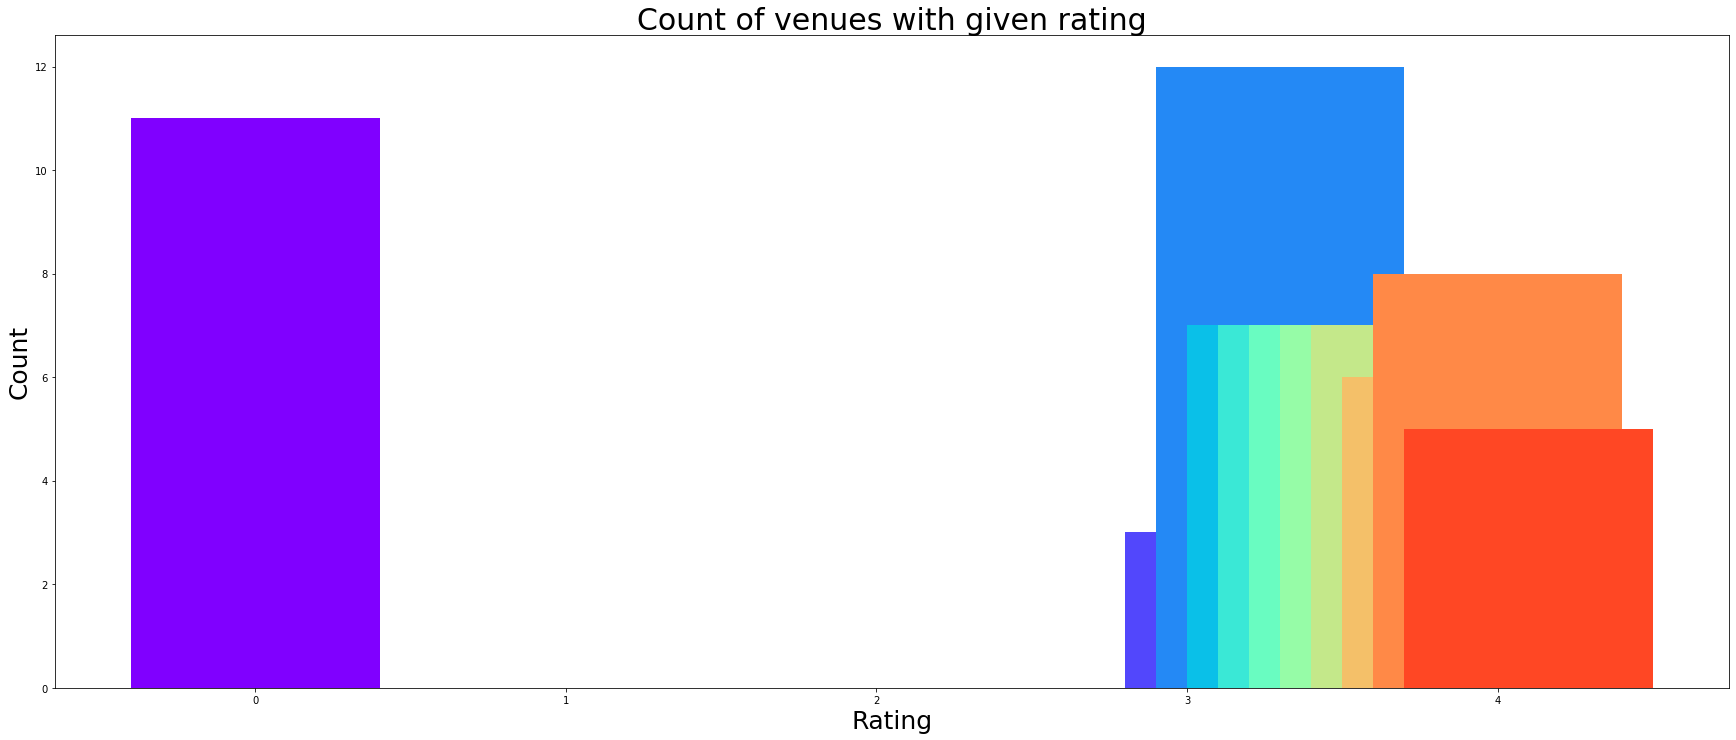

In [59]:
distribution_rating=tpty_zom['rating'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(distribution_rating.index,distribution_rating.values,color=color)
plt.xlabel("Rating", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given rating", fontsize = 30)

From the above plots we can understand that the ratings of the restaurants are highly ranging from 3.2 to 4.1.About 13 restaurants has the rating '0'.Lets explore the subset of the dataset which has poor rating of 0.

Text(0.5, 1.0, 'Count of venues with given cuisines')

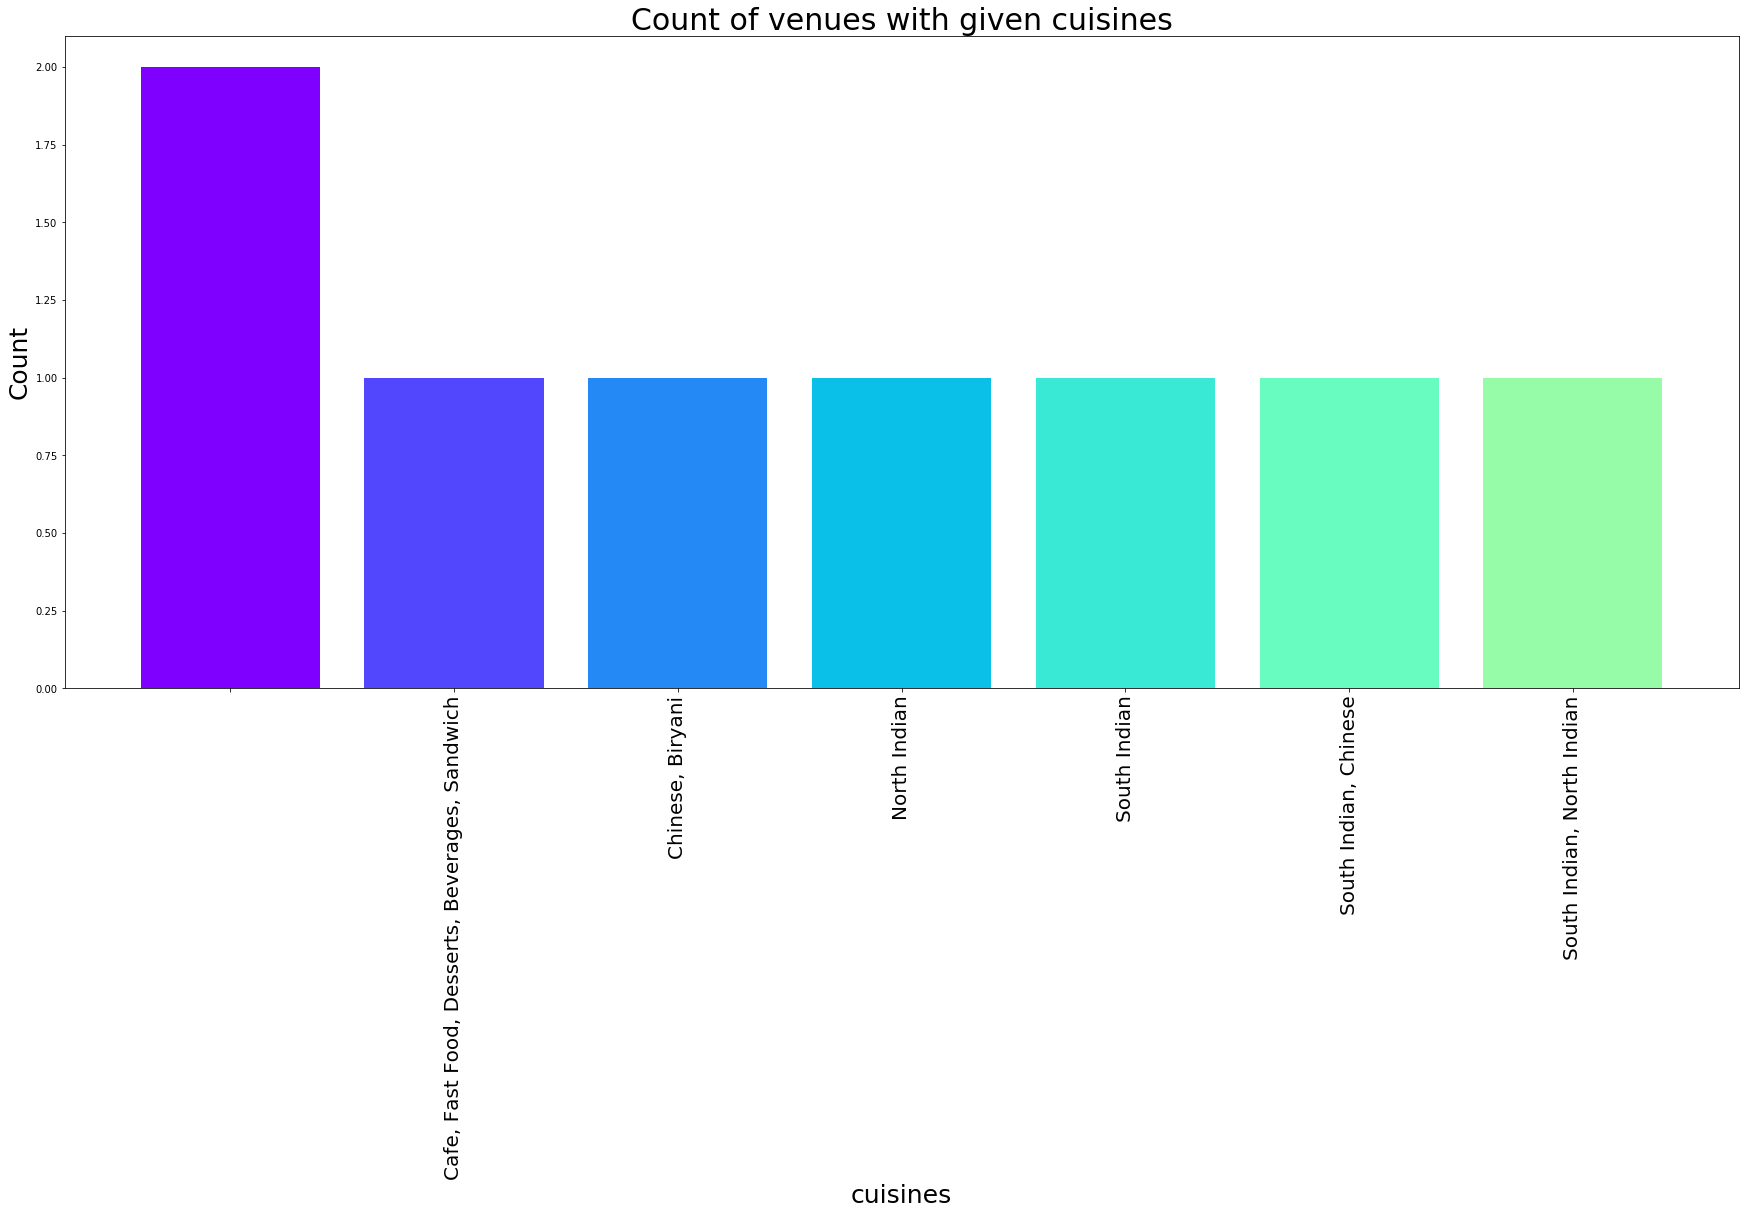

In [60]:
sub_tpty=tpty_zom[(tpty_zom['rating']==0) & (tpty_zom['distance']<=3)]
sub_tpty
cui=sub_tpty['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

From the above plot we can undestand that restaurants providing more or less  same kind of cuisines have 0 rating.We can't assess which cuisine/category  in particular has poor rating from the above plot.

price range for the distribution is pocket friendly in the city of Tirupathi.Zomato Price_range explains cost range from 1 to 4(1 being the pocket friendly to 4 being expensive)

Text(0.5, 1.0, 'Count of venues with given Price Range')

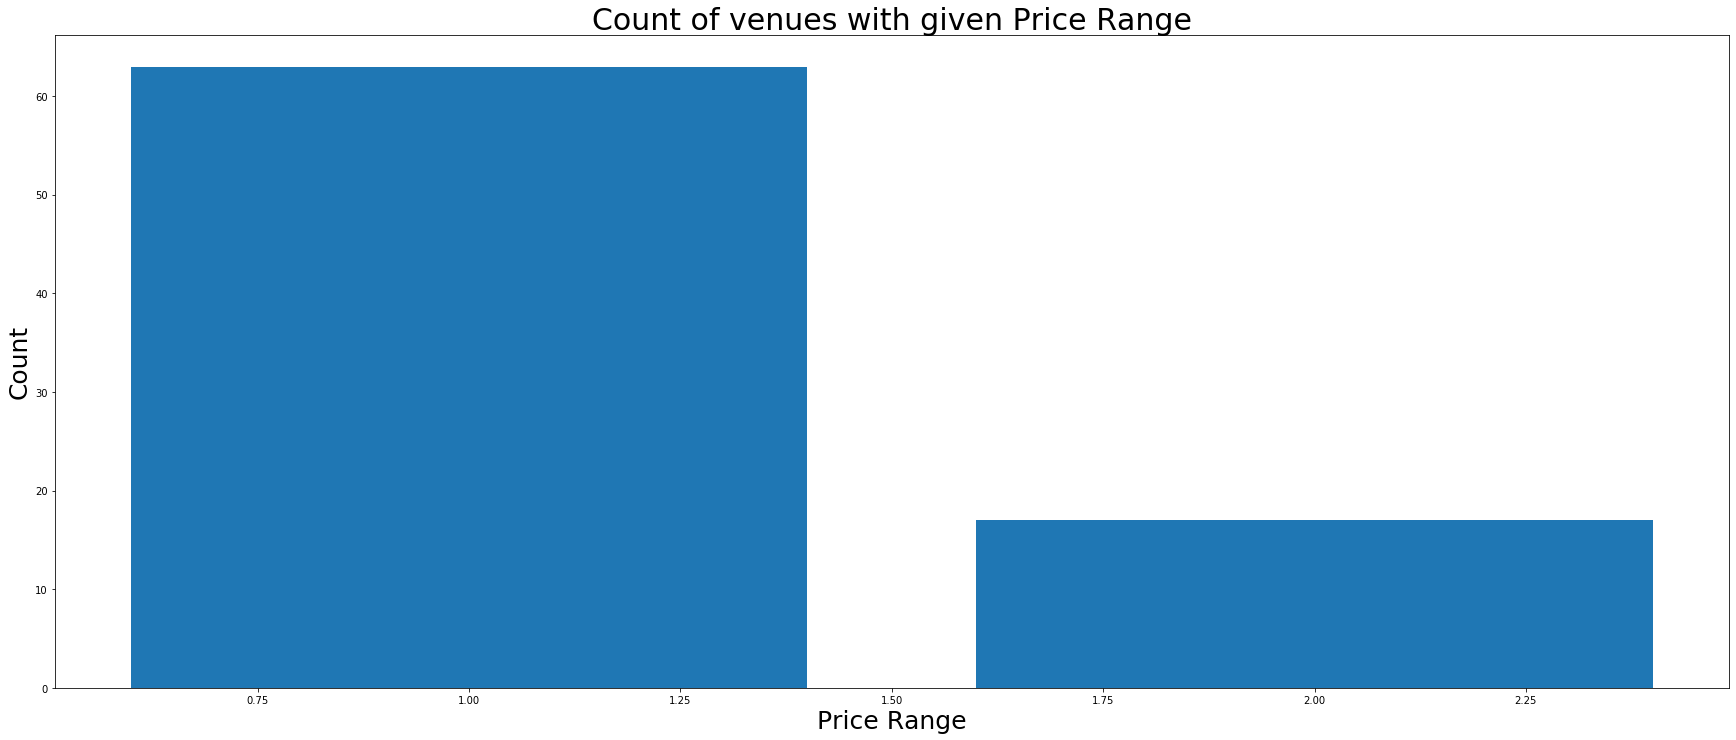

In [61]:
price_range=tpty_zom['price_range'].value_counts().sort_index()
plt.figure(figsize = (30, 12))
plt.bar(price_range.index,price_range.values)

plt.xlabel("Price Range", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given Price Range", fontsize = 30)


#### Price
We will take a look at cost of two across all the venues.We can understand the range of prices in the city.

Text(0.5, 1.0, 'Count of venues with given average price')

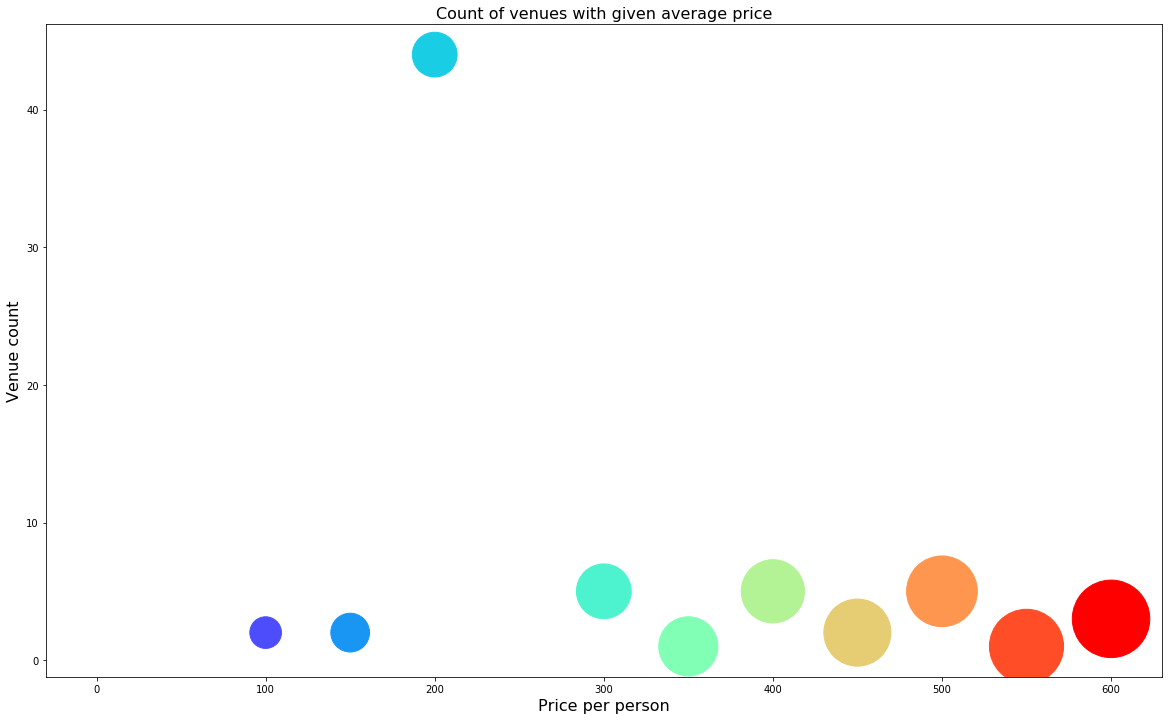

In [62]:
average_prices = tpty_zom['price_for_two'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

Lowest price range for the restaurants in tirupathi is 100.Maximum price range for the restaurants is 600.Maximum number of restaurants has the price range of 200.

### Clustering based on the price,price_range_rating and distance

In [92]:
final_ven=tpty_zom[(tpty_zom['distance']<=3) &(tpty_zom['rating']!=0) & (tpty_zom['price_for_two']!=0)]
final_ven.shape


(56, 9)

In [93]:
final_ven=final_ven.drop(['venue','address','cuisines'],1)
final_ven.head()

,latitude,longitude,price_for_two,price_range,rating,distance
0,13.642060,79.409931,200.0,1.0,3.7,1.34
1,13.642112,79.409935,200.0,1.0,3.6,1.34
4,13.646535,79.419388,200.0,1.0,3.8,2.00
5,13.642491,79.429706,500.0,2.0,3.7,2.39
6,13.634376,79.428145,200.0,1.0,3.3,1.85


 **To find the best parameter we are iterating through a range of K- values with the critera of Within cluster sum of Squares**

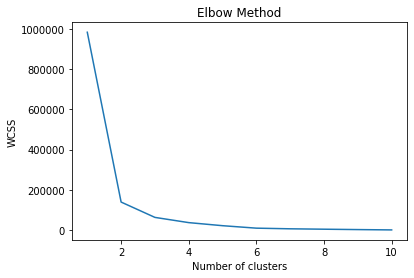

In [94]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(final_ven)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
#cluster the areas based on the  various features of restaurants
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 4

clustering = final_ven
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)



In [96]:
kMeans.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 3, 1, 1, 1, 3, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1])

In [99]:
clustered_df=tpty_zom[(tpty_zom['distance']<=3) &(tpty_zom['rating']!=0)& (tpty_zom['price_for_two']!=0)]

In [100]:
clustered_df.insert(0, 'cluster_labels', kMeans.labels_)
clustered_df.head()


,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
0,1,Chillies Spicy Foods,13.642060,79.409931,200.0,1.0,3.7,"D.No.6-1-1T/3, Near SV Medical College, old Al...","Chinese, Biryani, Andhra",1.34
1,1,Hotel Sri Lakshmi Bhavan,13.642112,79.409935,200.0,1.0,3.6,"6-1-T/3, Old Alipiri Road, Near S.V. Medical C...","South Indian, North Indian, Fast Food, Chinese...",1.34
4,1,M2 Grand Restaurant,13.646535,79.419388,200.0,1.0,3.8,"18-1-45/18/A, Santhi Nagar, Anna Rao Circle, K...","Biryani, North Indian, Chinese, South Indian",2.00
5,0,Udayees Hotel BVN Grand,13.642491,79.429706,500.0,2.0,3.7,"20-3-115, Yerramitta, SN Puram, Leelamahal Cir...","North Indian, Chinese, Biryani",2.39
6,1,Hotel SLV Grand,13.634376,79.428145,200.0,1.0,3.3,"D.no. 20/2/626/B9, Beside TMC Music Centre, Ti...","South Indian, North Indian",1.85


# Analysis <a name='analysis' ></a>

In [101]:
cluster_0=clustered_df[clustered_df['cluster_labels']==0]
print('Mean distance of a distance from central location of cluster 0: ',clustered_df[clustered_df['cluster_labels']==0]['distance'].mean())
print('Mean rating of cluster 0: ',clustered_df[clustered_df['cluster_labels']==0]['rating'].mean())
print('Mean price rate for an individual of cluster 0: ',(clustered_df[clustered_df['cluster_labels']==0]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 0 '.format(clustered_df[clustered_df['cluster_labels']==0]['rating'].shape[0]))
print('{} % of restaurants are in cluster 0 '.format(round((cluster_0.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 0:  1.4575
Mean rating of cluster 0:  3.8375
Mean price rate for an individual of cluster 0:  271.875
There are 8 restaurants in cluster 0 
14.29 % of restaurants are in cluster 0 


Text(0.5, 1.0, 'Count of venues with given cuisines')

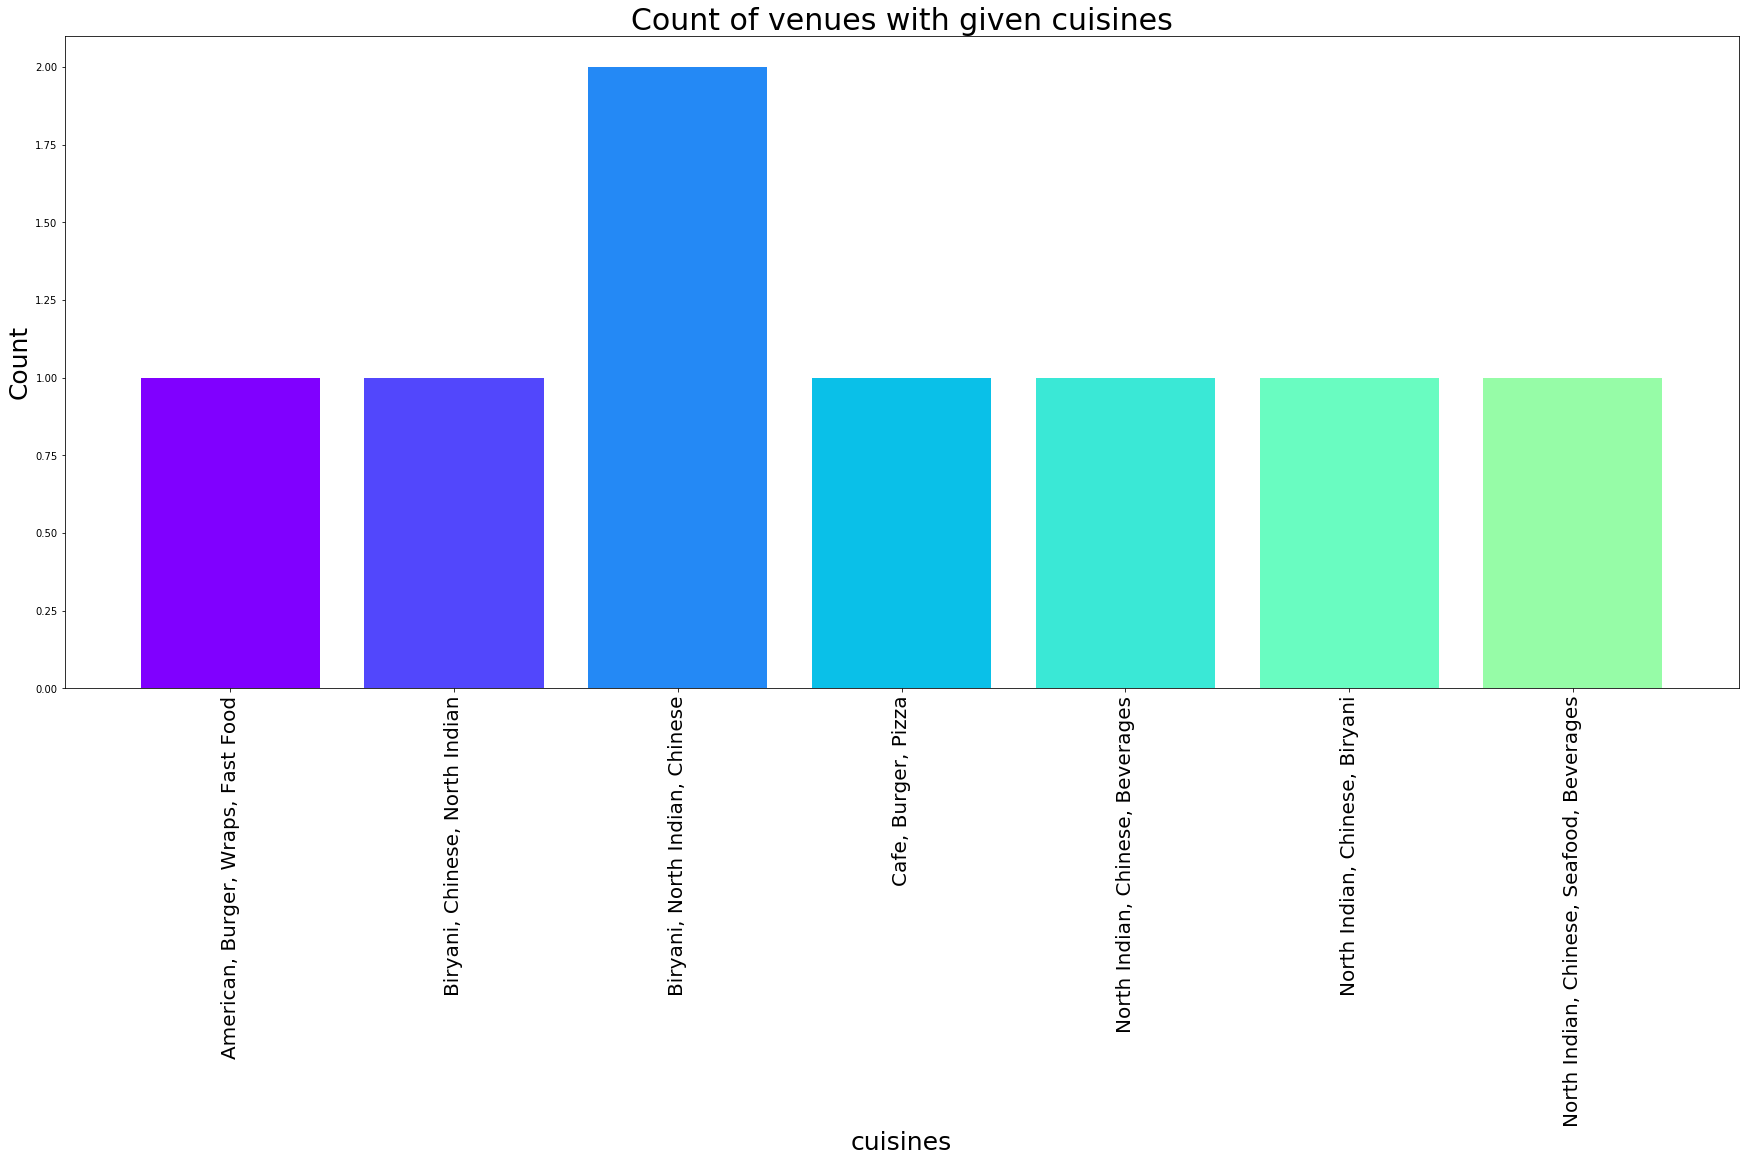

In [129]:
cui=cluster_0['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [102]:
cluster_1=clustered_df[clustered_df['cluster_labels']==1]
print('Mean distance of a distance from central location of cluster 1: ',clustered_df[clustered_df['cluster_labels']==1]['distance'].mean())
print('Mean rating of cluster 1: ',clustered_df[clustered_df['cluster_labels']==1]['rating'].mean())
print('Mean price rate for an individual of cluster 1: ',(clustered_df[clustered_df['cluster_labels']==1]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 1 '.format(clustered_df[clustered_df['cluster_labels']==1]['rating'].shape[0]))
print('{} % of restaurants are in cluster 1 '.format(round((cluster_1.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 1:  1.5399999999999998
Mean rating of cluster 1:  3.6315789473684212
Mean price rate for an individual of cluster 1:  97.36842105263158
There are 38 restaurants in cluster 1 
67.86 % of restaurants are in cluster 1 


Text(0.5, 1.0, 'Count of venues with given cuisines')

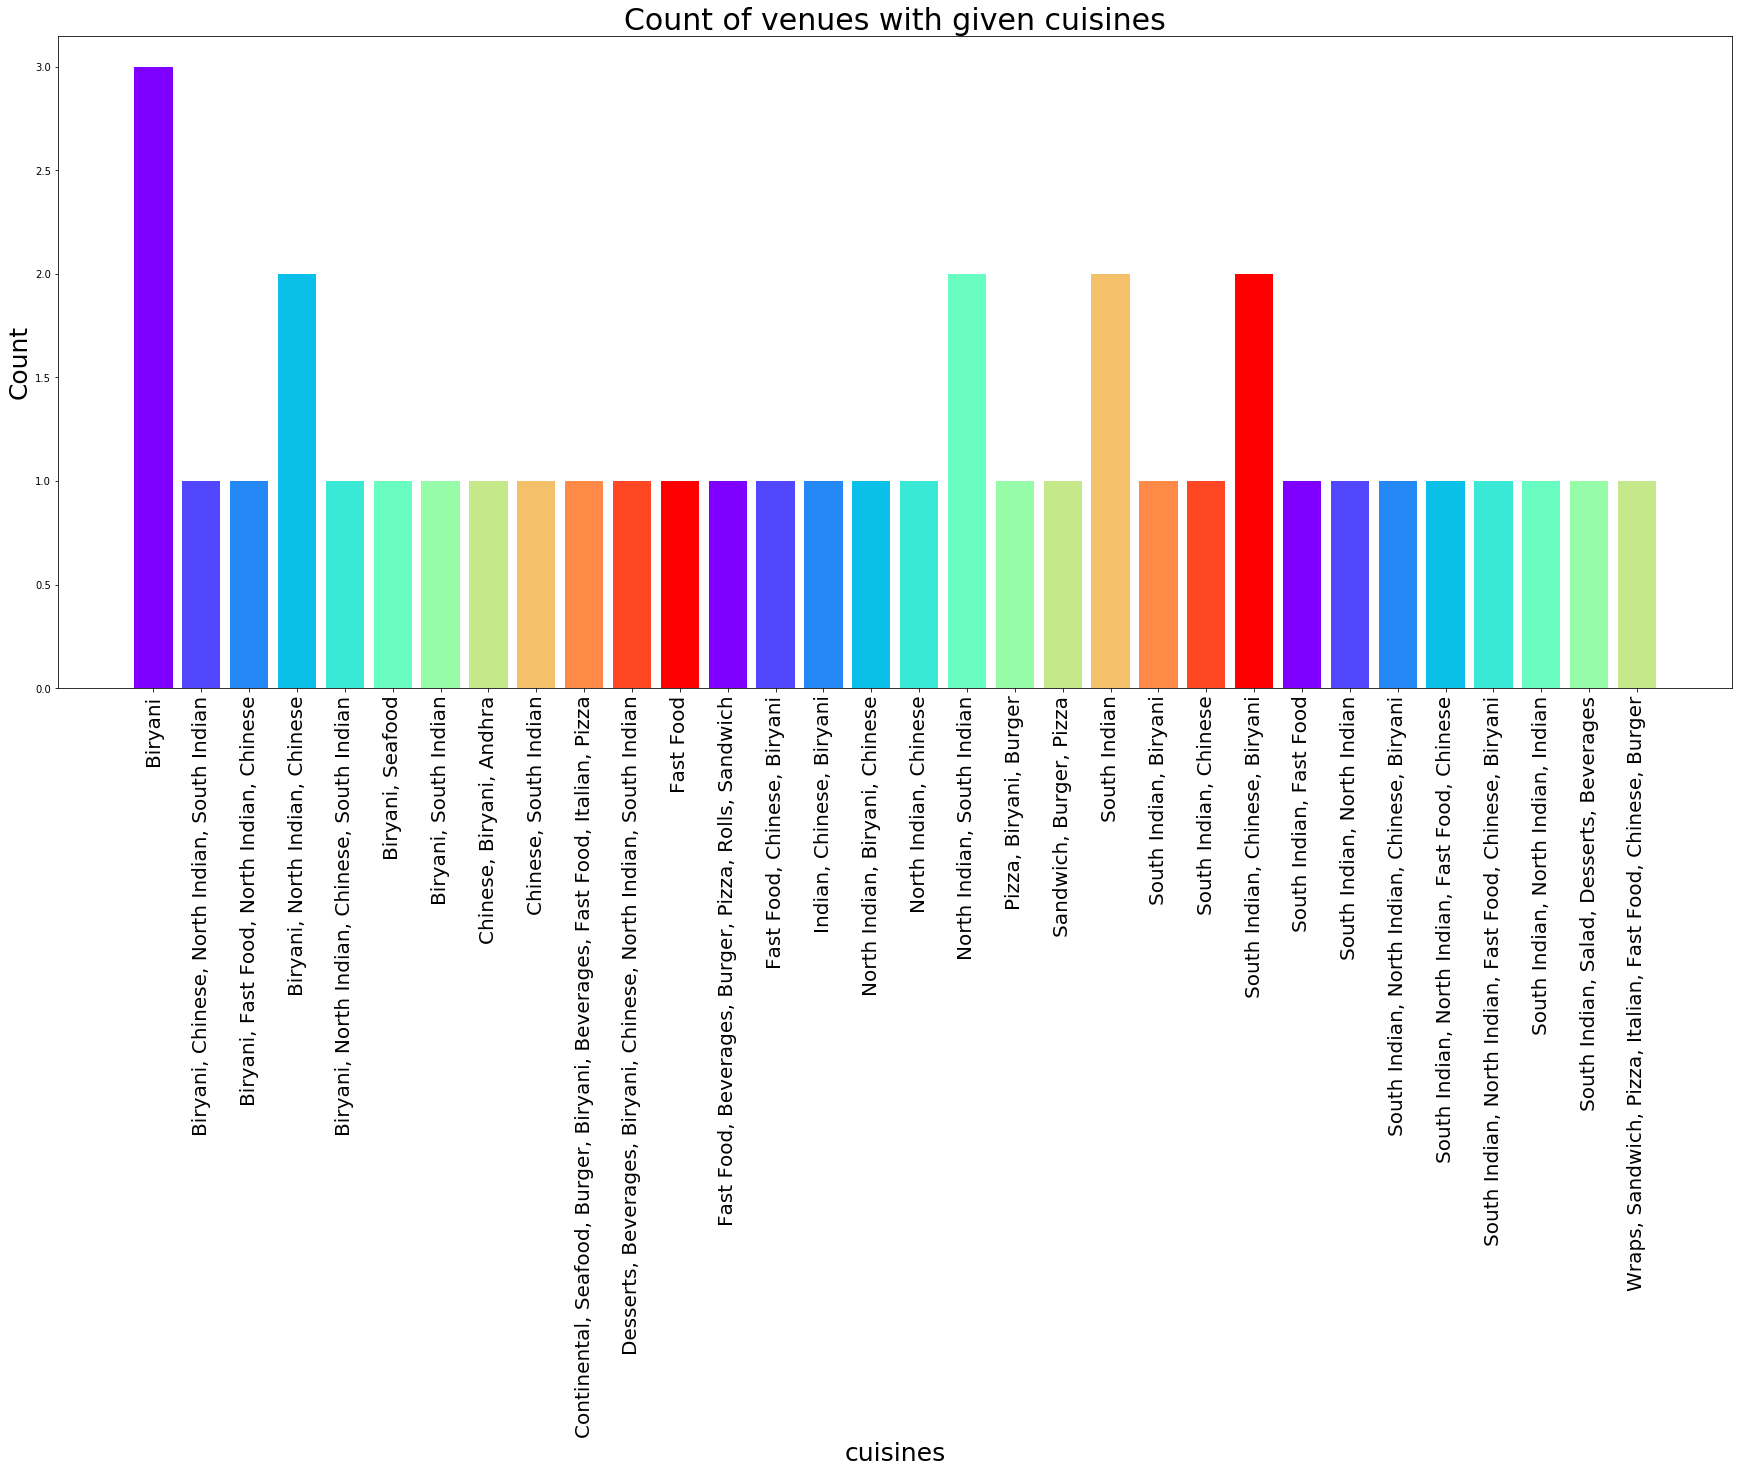

In [130]:

cui=cluster_1['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [136]:
cluster_1

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
0,1,Chillies Spicy Foods,13.642060,79.409931,200.0,1.0,3.7,"D.No.6-1-1T/3, Near SV Medical College, old Al...","Chinese, Biryani, Andhra",1.34
1,1,Hotel Sri Lakshmi Bhavan,13.642112,79.409935,200.0,1.0,3.6,"6-1-T/3, Old Alipiri Road, Near S.V. Medical C...","South Indian, North Indian, Fast Food, Chinese...",1.34
4,1,M2 Grand Restaurant,13.646535,79.419388,200.0,1.0,3.8,"18-1-45/18/A, Santhi Nagar, Anna Rao Circle, K...","Biryani, North Indian, Chinese, South Indian",2.00
6,1,Hotel SLV Grand,13.634376,79.428145,200.0,1.0,3.3,"D.no. 20/2/626/B9, Beside TMC Music Centre, Ti...","South Indian, North Indian",1.85
7,1,Dakshin Pure Vegetarian Restaurant (PLR Grand ...,13.630851,79.425957,200.0,1.0,3.5,"13/6/759/D, Near APSRTC Central Bus Stand, Tir...","North Indian, South Indian",1.56
9,1,Hotel Bhimas,13.628908,79.419205,200.0,1.0,3.8,"No - 42, G Car Street, Tirupati, Tirumala, Tir...","Desserts, Beverages, Biryani, Chinese, North I...",0.83
10,1,Bhimas Paradise,13.626641,79.430743,200.0,1.0,3.7,"Bhimas Paradise, renigunta road, tirupati, Tir...","South Indian, North Indian, Indian",2.11
11,1,Kalyan Residency,13.628835,79.423492,200.0,1.0,3.4,"177, T.P.Area, Tirumala, Tirupati","North Indian, South Indian",1.29
15,1,Hotel Sushma Punjabi Dhaba,13.632240,79.427652,200.0,1.0,3.4,"D.No.13-6-600/44/159/5, Peda Kapu Layout, Reve...","South Indian, North Indian, Fast Food, Chinese",1.75
16,1,Hotel Udayee International,13.628945,79.427848,200.0,1.0,3.5,"13-6-771/20, Opposite APSRTC Bus Stand, Tiruma...","Biryani, South Indian",1.76


In [103]:
cluster_2=clustered_df[clustered_df['cluster_labels']==2]
print('Mean distance of a distance from central location of cluster 2: ',clustered_df[clustered_df['cluster_labels']==2]['distance'].mean())
print('Mean rating of cluster 2: ',clustered_df[clustered_df['cluster_labels']==2]['rating'].mean())
print('Mean price rate for an individual of cluster 2: ',(clustered_df[clustered_df['cluster_labels']==2]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 2 '.format(clustered_df[clustered_df['cluster_labels']==2]['rating'].shape[0]))
print('{} % of restaurants are in cluster 2 '.format(round((cluster_2.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 2:  1.4283333333333335
Mean rating of cluster 2:  3.8166666666666664
Mean price rate for an individual of cluster 2:  208.33333333333334
There are 6 restaurants in cluster 2 
10.71 % of restaurants are in cluster 2 


Text(0.5, 1.0, 'Count of venues with given cuisines')

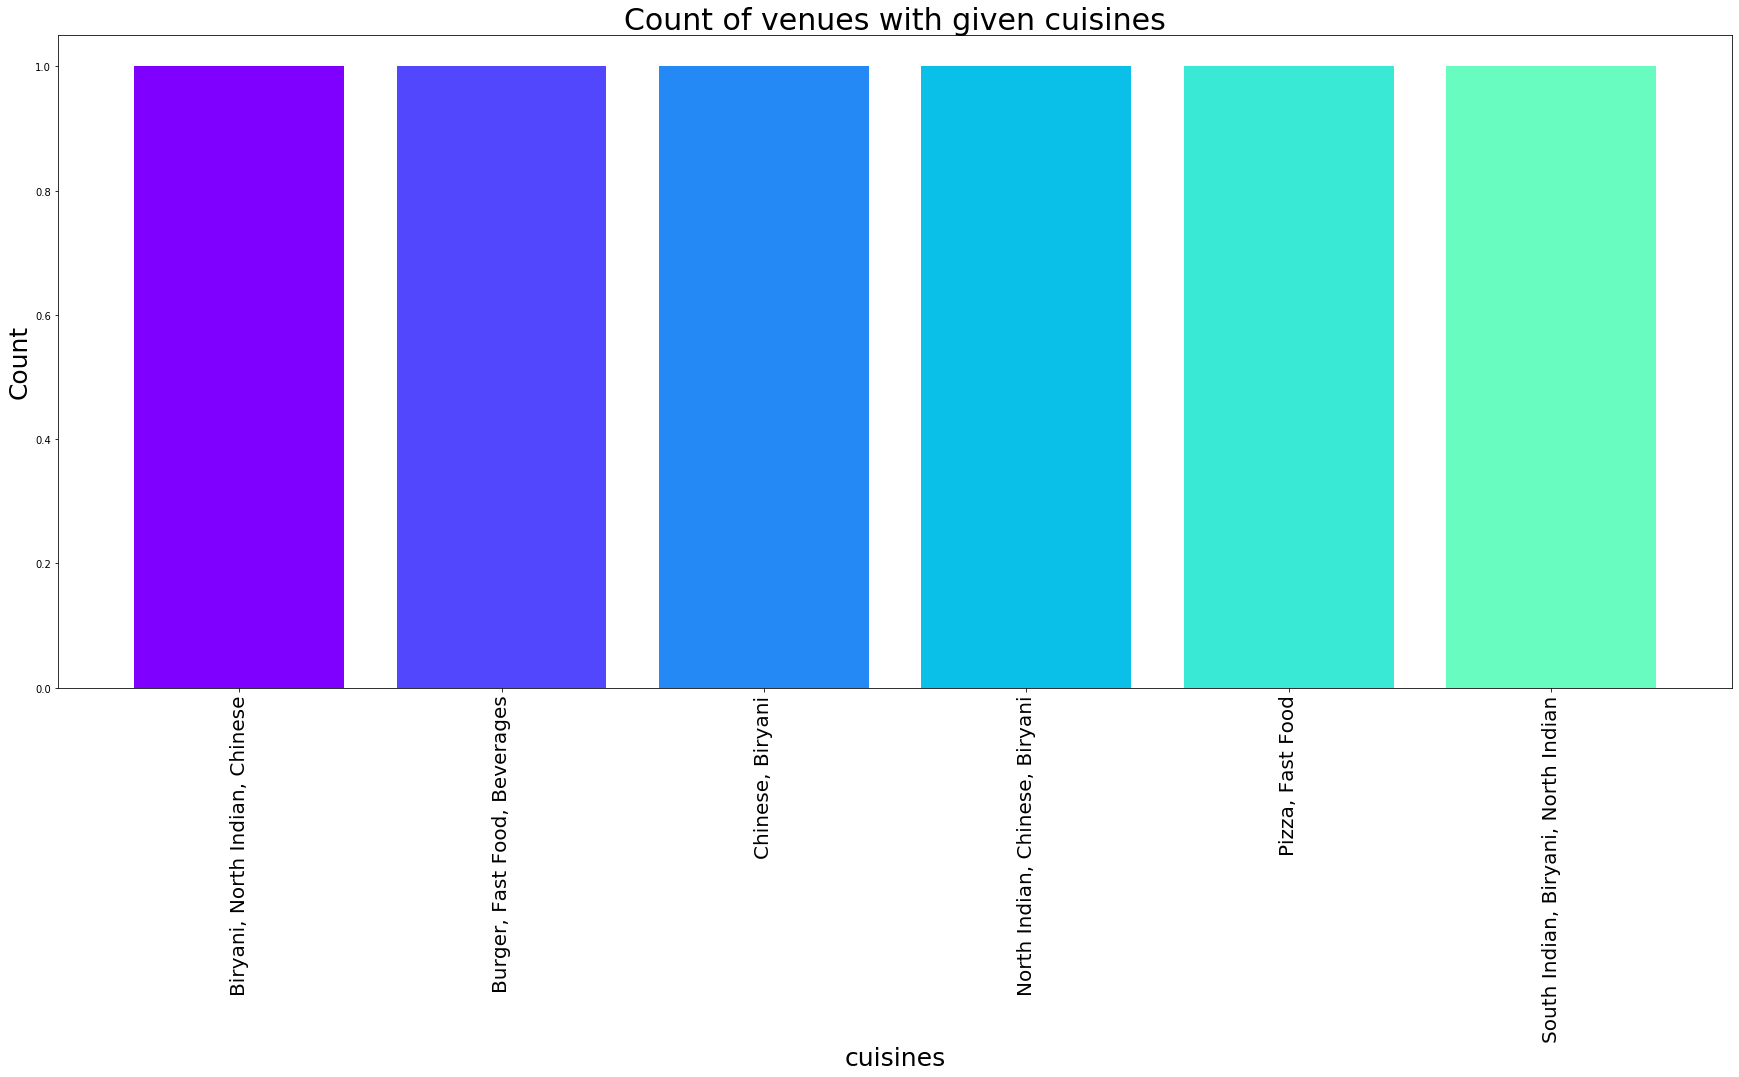

In [131]:

cui=cluster_2['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [134]:
cluster_2

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
20,2,Vrinda - Hotel Sindhuri Park,13.630021,79.420503,450.0,2.0,3.5,DNO:14-2-118 OPP:Koneru T.P Area Tirupati Chit...,"South Indian, Biryani, North Indian",0.96
27,2,Nellore Vari Hotel Riyaz,13.622015,79.418745,400.0,2.0,3.7,"Bairagipatteda, K.V.R jewllery back side, Anna...","Chinese, Biryani",1.18
139,2,Table 9,13.629069,79.424766,400.0,2.0,4.0,"Tp Area, Tirupati - 517501, Beside Pgr Theatre...","Biryani, North Indian, Chinese",1.43
141,2,Spicy Paradise,13.628773,79.424901,400.0,2.0,3.9,"No - 216, opp apsrtc busstand, tirupati, Tirum...","North Indian, Chinese, Biryani",1.45
150,2,KFC,13.636906,79.421622,450.0,2.0,4.1,"V V Mahal Road, Behind Bank Of Baroda, Near Mu...","Burger, Fast Food, Beverages",1.32
232,2,Domino's Pizza,13.626474,79.431844,400.0,2.0,3.7,"Door No 19-3-13/B, Municipal Ward No 19 Renigu...","Pizza, Fast Food",2.23


In [104]:
cluster_3=clustered_df[clustered_df['cluster_labels']==3]
print('Mean distance of a distance from central location of cluster 3 ',clustered_df[clustered_df['cluster_labels']==3]['distance'].mean())
print('Mean rating of cluster 3: ',clustered_df[clustered_df['cluster_labels']==3]['rating'].mean())
print('Mean price rate for an individual of cluster 3: ',(clustered_df[clustered_df['cluster_labels']==3]['price_for_two']/2).mean())
print('There are {} restaurants in cluster  '.format(clustered_df[clustered_df['cluster_labels']==3]['rating'].shape[0]))
print('{} % of restaurants are in cluster 3 '.format(round((cluster_3.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 3  1.315
Mean rating of cluster 3:  3.8
Mean price rate for an individual of cluster 3:  156.25
There are 4 restaurants in cluster  
7.14 % of restaurants are in cluster 3 


Text(0.5, 1.0, 'Count of venues with given cuisines')

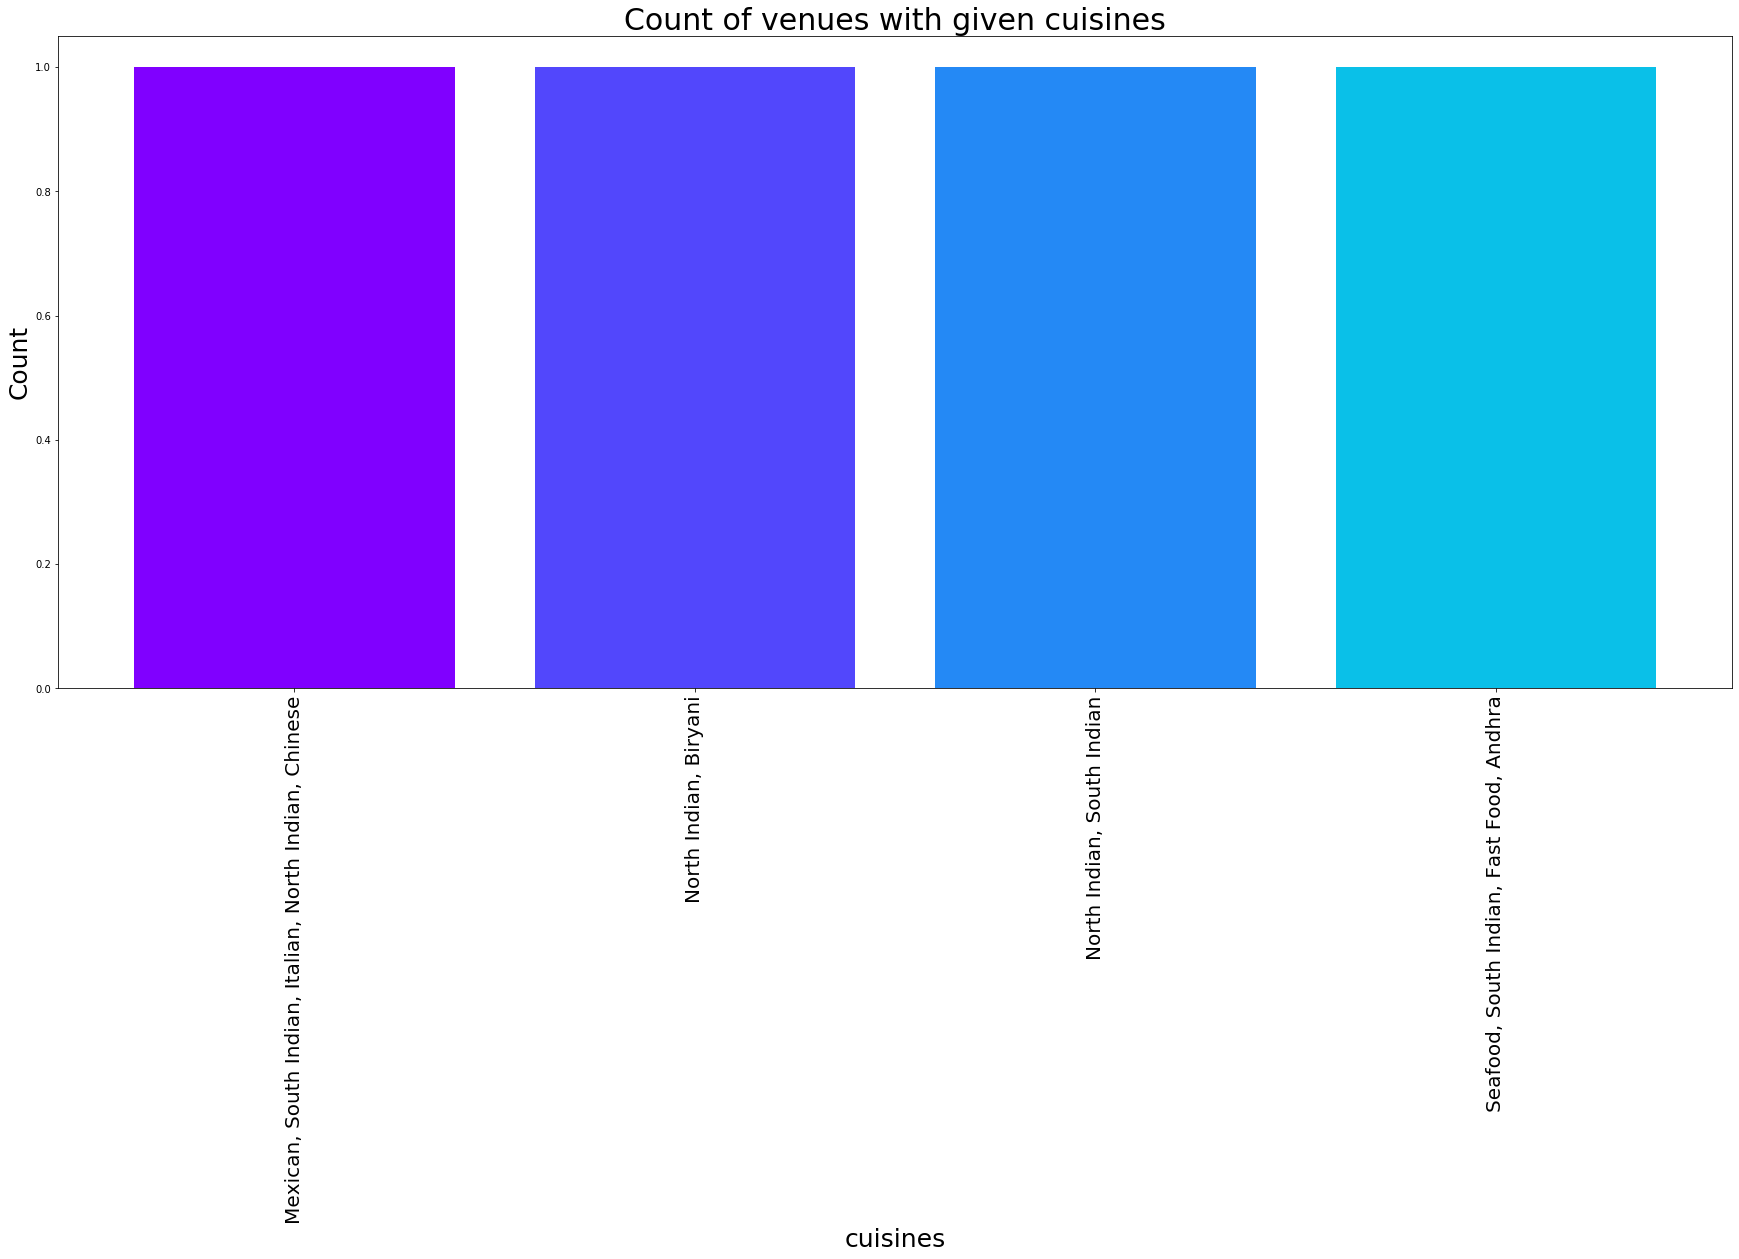

In [132]:

cui=cluster_3['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [ ]:
cluster_0=clustered_df[clustered_df['cluster_labels']==0]
cluster_0.head()

In [105]:
tpty_map=folium.Map(location=[latitude,longitude],zoom_start=14)
tpty_map

In [106]:
for lat,long,name,distance,rating in zip(cluster_0['latitude'],cluster_0['longitude'],cluster_0['venue'],cluster_0['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186aa',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)
tpty_map

In [107]:
cluster_1=clustered_df[clustered_df['cluster_labels']==1]
cluster_1.head()

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
0,1,Chillies Spicy Foods,13.642060,79.409931,200.0,1.0,3.7,"D.No.6-1-1T/3, Near SV Medical College, old Al...","Chinese, Biryani, Andhra",1.34
1,1,Hotel Sri Lakshmi Bhavan,13.642112,79.409935,200.0,1.0,3.6,"6-1-T/3, Old Alipiri Road, Near S.V. Medical C...","South Indian, North Indian, Fast Food, Chinese...",1.34
4,1,M2 Grand Restaurant,13.646535,79.419388,200.0,1.0,3.8,"18-1-45/18/A, Santhi Nagar, Anna Rao Circle, K...","Biryani, North Indian, Chinese, South Indian",2.00
6,1,Hotel SLV Grand,13.634376,79.428145,200.0,1.0,3.3,"D.no. 20/2/626/B9, Beside TMC Music Centre, Ti...","South Indian, North Indian",1.85
7,1,Dakshin Pure Vegetarian Restaurant (PLR Grand ...,13.630851,79.425957,200.0,1.0,3.5,"13/6/759/D, Near APSRTC Central Bus Stand, Tir...","North Indian, South Indian",1.56


In [108]:
for lat,long,name,distance,rating in zip(cluster_1['latitude'],cluster_1['longitude'],cluster_1['venue'],cluster_1['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3144aa',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)
tpty_map

In [109]:
cluster_2=clustered_df[clustered_df['cluster_labels']==2]
cluster_2.head()

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
20,2,Vrinda - Hotel Sindhuri Park,13.630021,79.420503,450.0,2.0,3.5,DNO:14-2-118 OPP:Koneru T.P Area Tirupati Chit...,"South Indian, Biryani, North Indian",0.96
27,2,Nellore Vari Hotel Riyaz,13.622015,79.418745,400.0,2.0,3.7,"Bairagipatteda, K.V.R jewllery back side, Anna...","Chinese, Biryani",1.18
139,2,Table 9,13.629069,79.424766,400.0,2.0,4.0,"Tp Area, Tirupati - 517501, Beside Pgr Theatre...","Biryani, North Indian, Chinese",1.43
141,2,Spicy Paradise,13.628773,79.424901,400.0,2.0,3.9,"No - 216, opp apsrtc busstand, tirupati, Tirum...","North Indian, Chinese, Biryani",1.45
150,2,KFC,13.636906,79.421622,450.0,2.0,4.1,"V V Mahal Road, Behind Bank Of Baroda, Near Mu...","Burger, Fast Food, Beverages",1.32


In [110]:
for lat,long,name,distance,rating in zip(cluster_2['latitude'],cluster_2['longitude'],cluster_2['venue'],cluster_2['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#8186aa',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)
tpty_map

In [111]:
cluster_3=clustered_df[clustered_df['cluster_labels']==3]
cluster_3.head()

,cluster_labels,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisines,distance
25,3,Hotel Sun Light,13.622448,79.413251,300.0,1.0,3.8,"Door 23- 8-153, Air Bypass, M R Palli Circle, ...","North Indian, Biryani",0.87
47,3,Hotel Saravana Bhavan,13.650031,79.423859,350.0,2.0,3.7,"1-3-60/C, Santhi Nagar, Tirumala By Pass Road,...","North Indian, South Indian",2.57
144,3,Jalpaan,13.629023,79.427896,300.0,1.0,3.6,"Besides udayee international, Near RTC complex...","Mexican, South Indian, Italian, North Indian, ...",1.77
148,3,R K Meat Foods,13.630222,79.411143,300.0,1.0,4.1,"Town Club Complex, Tirupathi Ho, Tirupati - 51...","Seafood, South Indian, Fast Food, Andhra",0.05


In [112]:
for lat,long,name,distance,rating in zip(cluster_3['latitude'],cluster_3['longitude'],cluster_3['venue'],cluster_3['distance'],cluster_3['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3468aa',
        fill_opacity=0.7,
        parse_html=True).add_to(tpty_map)
tpty_map

## Results and Discussion<a name='results'></a>

Based on the analysis we can draw many conclusions.We have profiled the clusters based on the price_Range,rating,average price for two and distance from the centre.

From cluster 0 ,we can understand that the 14.29% of the restaurants lies within the mean distance of 1.67 kms(We have calculated the distance  using geographical co ordinates(however traffic and road  travel distance has to be considered for precise analysis).Ratings of the venues in this cluster are at 3.8375 which explains the quality of the restaurants located in this cluster.Price range for individuals is high with the mean price range at rs./271.875.Distance from the central location  is very fairly closer.We can profile this cluster as Mid price range profile with high quality food/Customer service.

From cluster 1, 67.86% of the restaurants lies within the mean distance of 1.53 kms.Ratings of the venues in this cluster is 3.63.Price range of this cluster is at rs/-97 ~ 100.We can profile this cluster as Midrange and Pocket friendly with cusines like Biryani,South indian,North Indian and Fastfoods  having high number restaurants.Pizza and Burger Joints are comparitively lesser in this cluster with rating of 3.72.None of the Pizza and Burger Joints in this cluster has a Franchisee of its own and doesnt offer home delivery.


From cluster 2, we can understand that 10.71% lies within the mean distance of 1.42 kms.Ratings of the venues in this cluster is 3.81.Price Range of this cluster is Rs/-200 approximately.We can see that this cluster has pizza franchise like dominos and KFC.KFC and dominos offers home delivery.

From cluster 3, Mean distance from central locationis close to 1.315 kms and has good rating of 3.8.Price range of cluster 3 is 156.25 which can be deemed as short distance mid range profile.


# Conclusion<a name='conclusion'></a>

The purpose of the project is to explore the neighborhood of Tirupathi and understand the restaurant scenario.The venues have been plotted with the clusters marked in interactive maps.Restauranteers can understand the various profiles in the city and thus weigh in the pros and cons of various profiles so that they can take informed decisions.